In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Employee-Attrition.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Check Duplicate Values

In [7]:
print(data.duplicated().value_counts())
data.drop_duplicates(inplace = True)
print(len(data))

False    1470
Name: count, dtype: int64
1470


## Check Missing Values

In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Data Visualization

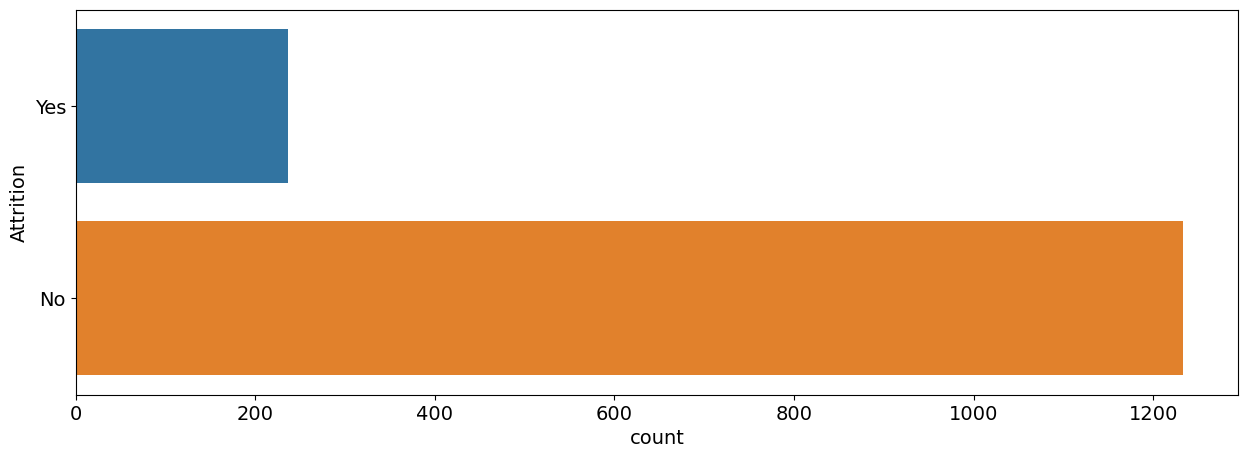

In [9]:
plt.figure(figsize =(15,5))
plt.rc("font", size=14)
sns.countplot(y="Attrition",data=data)
plt.show()

## Exploratory Data Analysis

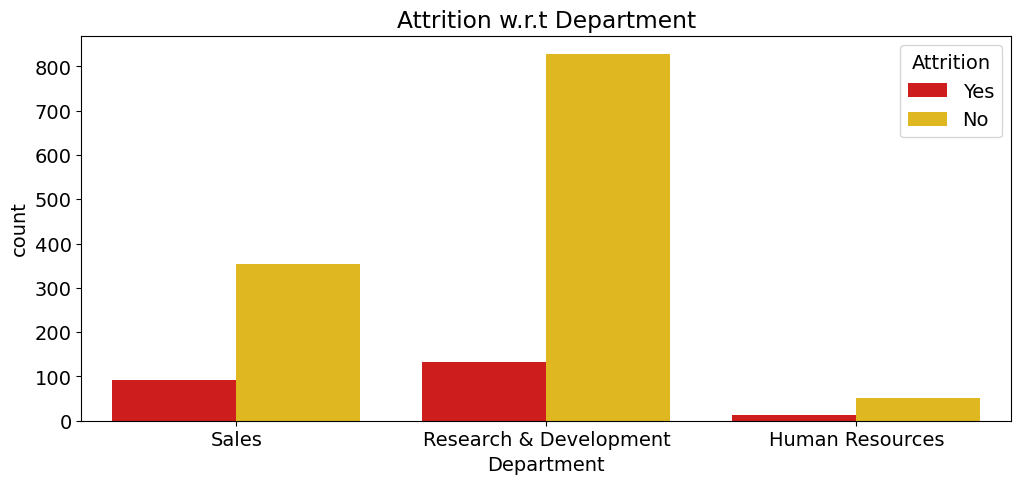

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t Department")
plt.show()

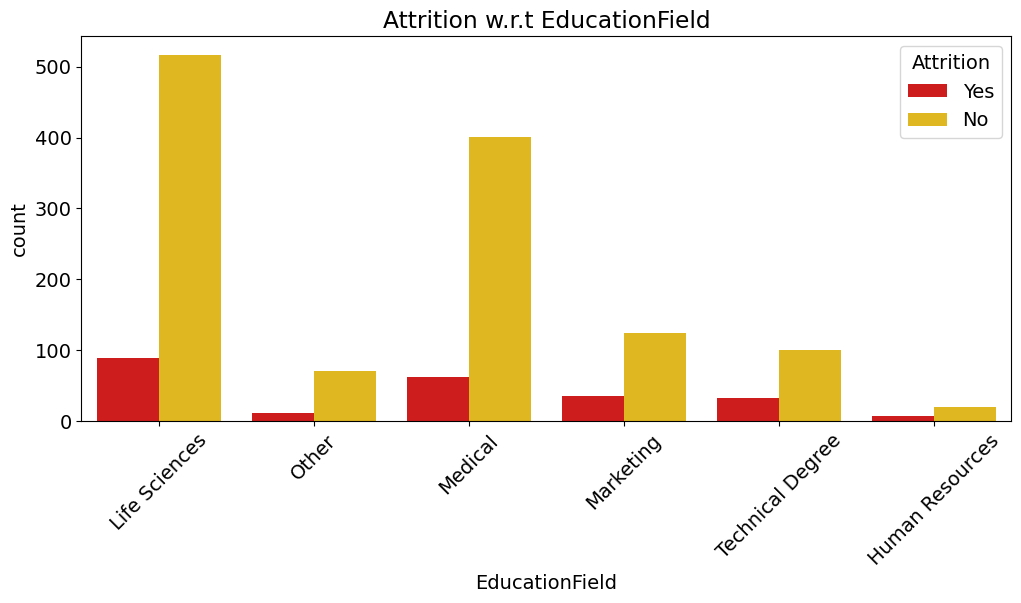

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField', hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

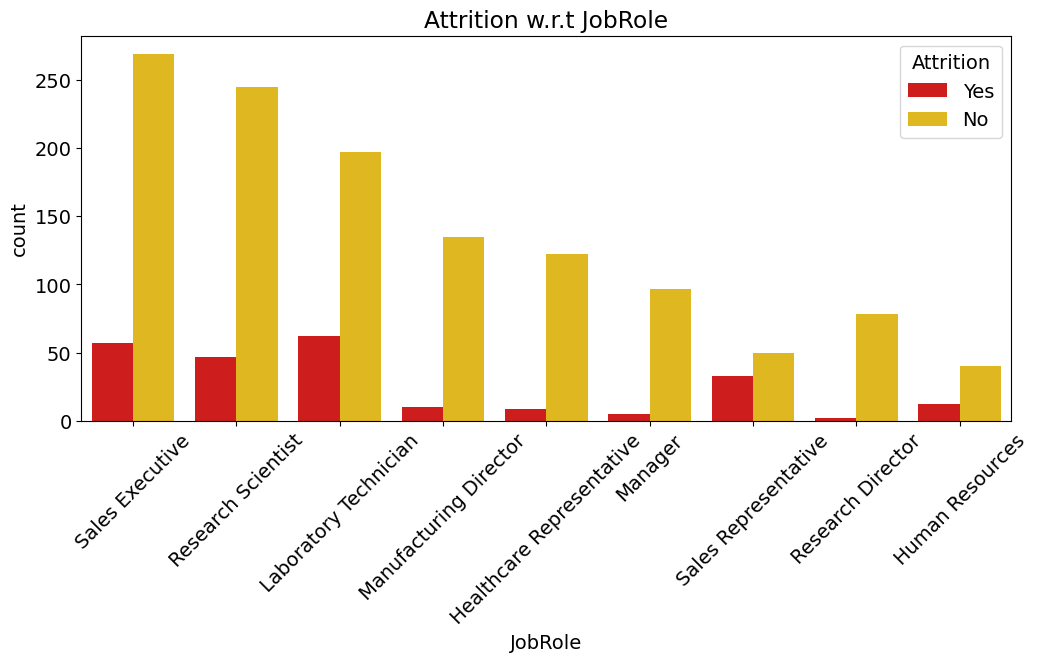

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t JobRole")
plt.xticks(rotation=45)
plt.show()

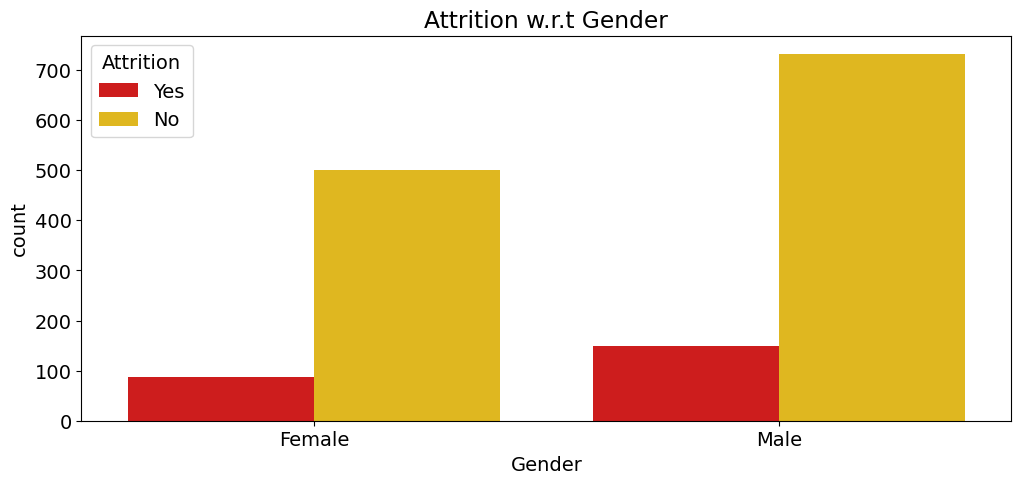

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender', hue='Attrition', data=data, palette='hot')
plt.title("Attrition w.r.t Gender")
plt.show()

In [14]:
ordinal_features = ['Education', 'EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 
                    'RelationshipSatisfaction', 'WorkLifeBalance']
data[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


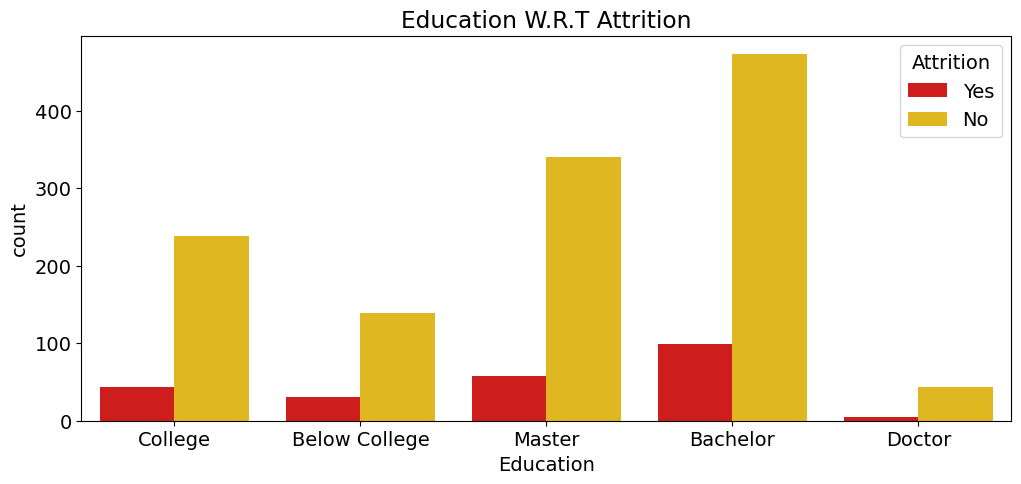

In [15]:
edu_map = {1 :'Below College', 2 :'College', 3 :'Bachelor', 4 :'Master', 5 :'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition', data=data, palette='hot')
plt.title("Education W.R.T Attrition")
plt.show()

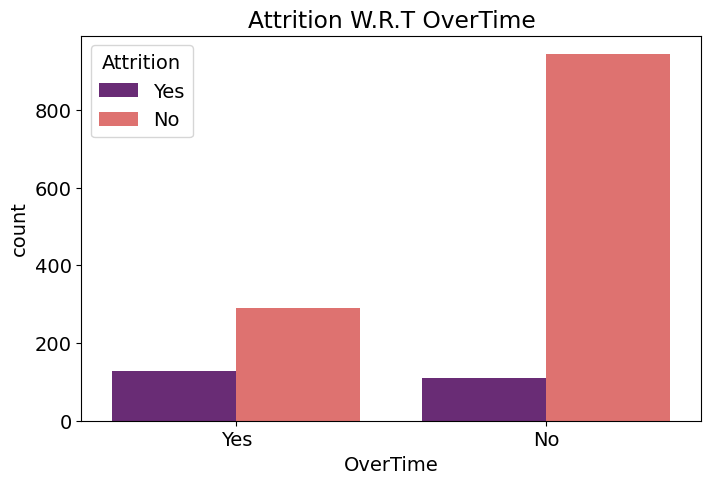

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='OverTime', hue='Attrition', data=data, palette='magma')
plt.title("Attrition W.R.T OverTime")
plt.show()

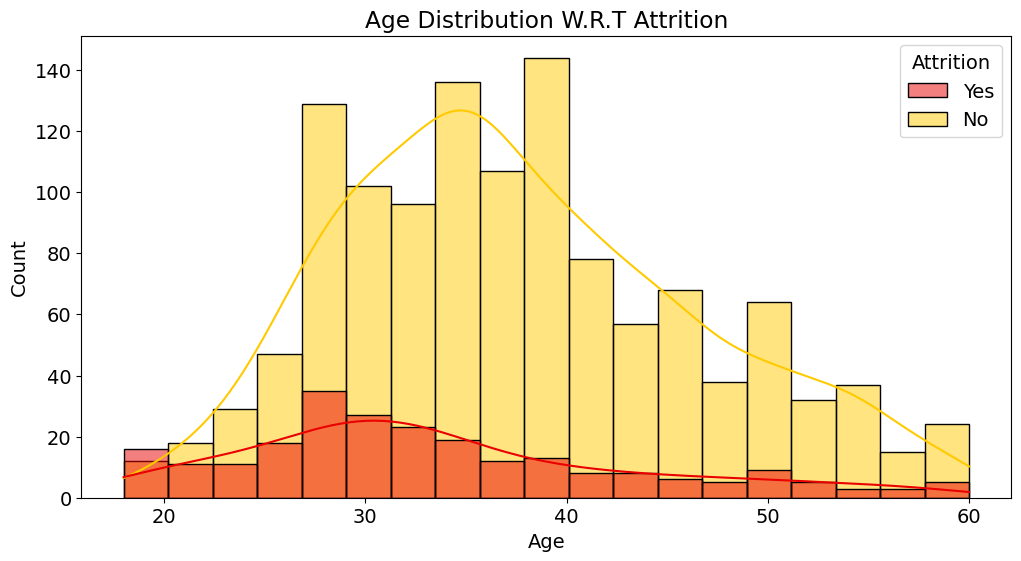

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='Age', hue='Attrition', kde=True, palette='hot')
plt.title("Age Distribution W.R.T Attrition")
plt.show()

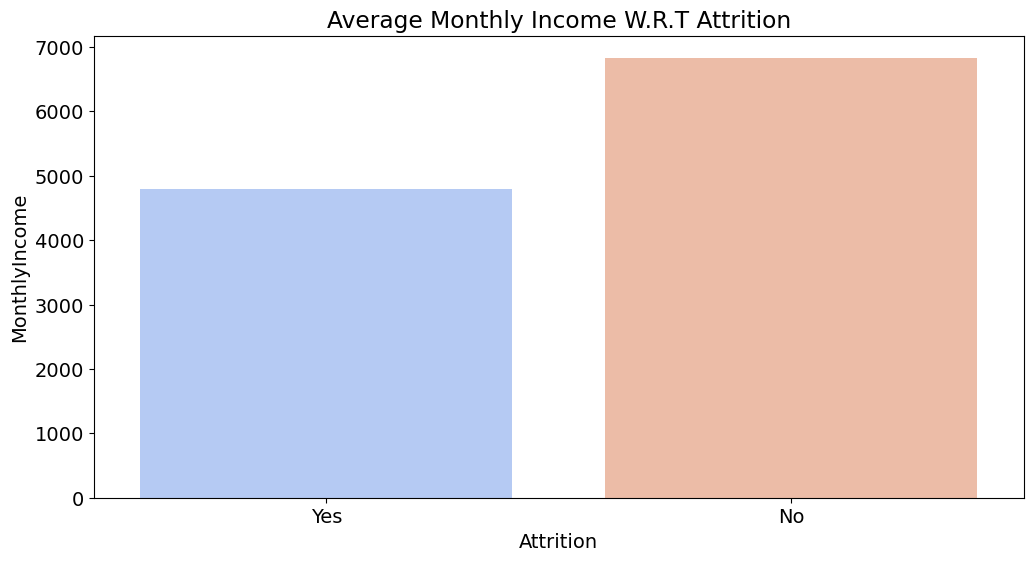

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='Attrition', y='MonthlyIncome', data=data, palette='coolwarm', ci=None)
plt.title("Average Monthly Income W.R.T Attrition")
plt.show()

## Conclusion

### This project on Employee Attrition Analysis helped in identifying critical factors influencing employee turnover, such as age, monthly income, overtime, job roles, and departmental differences. By leveraging data visualization and statistical analysis, the patterns and insights uncovered can assist HR teams in making data-driven decisions to improve employee satisfaction and reduce attrition rates.

### Through this project, I enhanced my skills in data preprocessing, visualization using libraries like Seaborn and Matplotlib, and the ability to draw actionable insights from complex datasets. This work highlights the value of analytics in solving real-world business challenges and demonstrates my capability to apply analytical techniques to drive meaningful outcomes.

